# Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("results.csv")
df.head()

,name,hour,max_high
0,BYND,9,140.559998
1,BYND,10,138.919998
2,BYND,11,138.259995
3,BYND,12,138.720001
4,BYND,13,138.850006


## Visual 1: Timeplot of all stocks

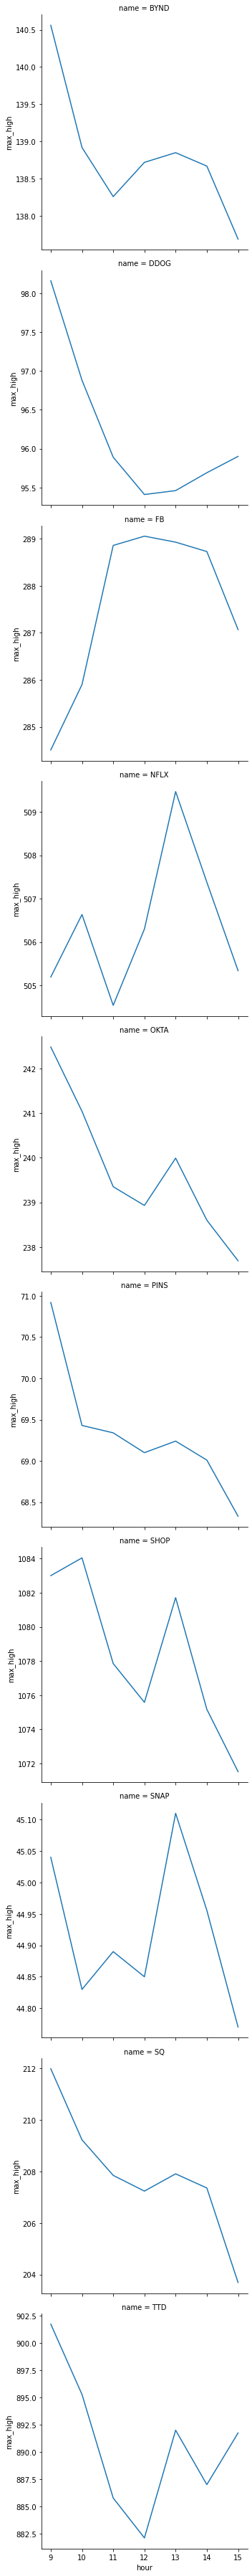

In [2]:
sns.relplot(x="hour",y="max_high",data=df,kind="line",row="name", 
            facet_kws={'sharey': False, 'sharex': True})

## Visual 2: which stock has the highest average max_high?
We can tell from the barchart that "SHOP" has the hightest average max_high.

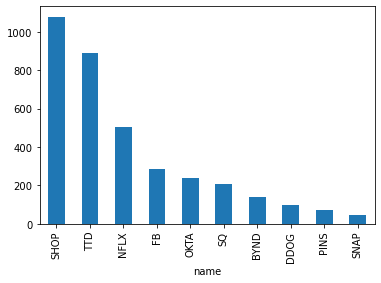

In [3]:
avg_max_high = df.groupby("name")["max_high"].mean().sort_values(ascending=False)

avg_max_high.plot(kind="bar")
plt.show()

# Visual 3: which stock is the most volatile?
It suggested that "SQ" was the most volatile stock on Dec 1st. And "SNAP" was the least volatile.

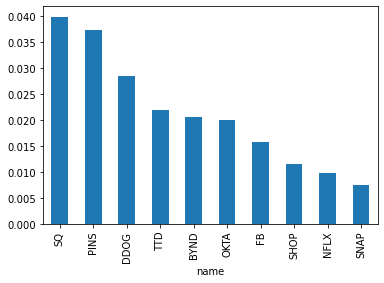

In [4]:
maxi = df.groupby("name")["max_high"].max()
mini = df.groupby("name")["max_high"].min()
vol = ((maxi-mini)/avg_max_high).sort_values(ascending=False)

vol.plot(kind="bar")
plt.show()

# Visual 4: stock price change
Which stock has higher close price than open price?

In [5]:
open_price = df[df["hour"]==9].set_index("name")
close_price = df[df["hour"]==15].set_index("name")
newdf = open_price.join(close_price, lsuffix='_open', rsuffix='_close')
newdf["price_change"] = newdf["max_high_close"]-newdf["max_high_open"]
newdf["higher"] = newdf["price_change"]>0
newdf

,hour_open,max_high_open,hour_close,max_high_close,price_change,higher
name,,,,,,
BYND,9,140.559998,15,137.690002,-2.869995,False
DDOG,9,98.160004,15,95.900002,-2.260002,False
FB,9,284.510010,15,287.070007,2.559998,True
NFLX,9,505.193115,15,505.339996,0.146881,True
OKTA,9,242.479996,15,237.690002,-4.789993,False
PINS,9,70.919998,15,68.330002,-2.589996,False
SHOP,9,1082.999878,15,1071.520020,-11.479858,False
SNAP,9,45.040001,15,44.770000,-0.270000,False
SQ,9,211.992706,15,203.690002,-8.302704,False


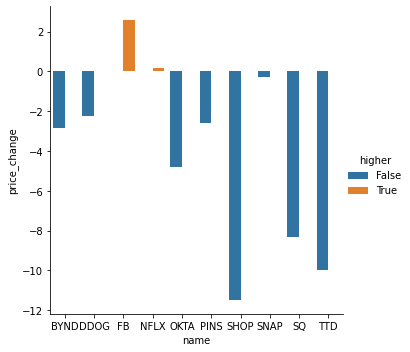

In [6]:
sns.catplot(x="name",y="price_change",data=newdf.reset_index(),kind="bar",hue="higher")

It shows that only "FB" and "NFLX" had higher close price than open price on Dec 1st.